In [ ]:
# LOM Fluxonium Qubits

## Sections
1. Prepare the layout in qiskit-metal. <br>
1. Run finite element LOM analysis. <br>


In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket
#from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent


#from qiskit_metal.renderers.renderer_gds.gds_renderer import QGDSRenderer
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping

import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis

### Create the Qubit design

Setup a design of a given dimension. Dimensions will be respected in the design rendering. <br>
Note that the design size extends from the origin into the first quadrant.

Here we have only one of the qubits.

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.material = 'silicon'
design.chips.main.size['size_x'] = '9mm'
design.chips.main.size['size_y'] = '9mm'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'

design.delete_all_components()


hfss = design.renderers.hfss
gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

# Q1 details
options = dict(chip='main', pad_gap='30um', orientation='0',
        nanowire_inductor='True',
        pad_width='15um', pad_height='140um',  
        pad_radius='80um',  l_arm_length='50um', l_arm_width='2um', l_length='80um',
        l_inductance='100nH', l_width='2um',
        l_ind_per_square='2nH',
        l_fillet = '1um', 
        L_j = '16.35nH',
        pocket_width='800um',
        pocket_height='800um',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='150um', fbl_height ='50um',
            cpw_width ='cpw_width',
            cpw_gap = 'cpw_gap',), 
               
    charge_line_options=Dict(loc_H = +1, loc_W='0', make_cl = True,
            cl_length = '80um', cl_sep ='10um',
            cpw_width='cpw_width', cpw_gap= 'cpw_gap', 
                            ), 
    readout_line_options=Dict(loc_H = -1, loc_W='0', make_rol = True, 
            pad_width = '350um', pad_height = '90um',
            pad_sep='65um',  cpw_width='cpw_width',
            cpw_gap='cpw_gap',
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
        **options))

gui.rebuild()
#gui.autoscale()

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

 

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  super().__setattr__(name, value)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  vertices = concatenate([

  vertices = concatenate([

  vertices = concatenate([



In [226]:
?draw

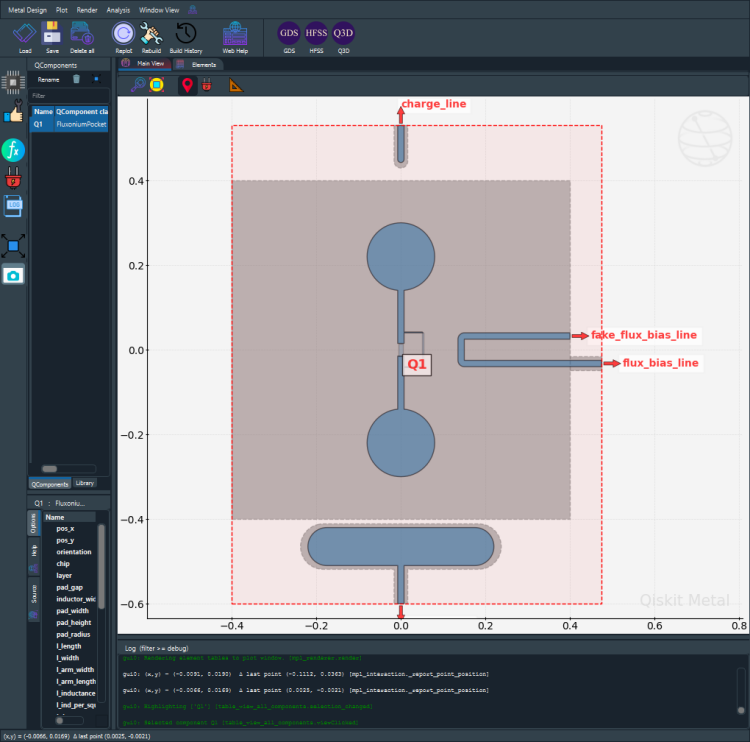

In [145]:
gui.screenshot()

In [ ]:
## 2. Capacitance Analysis and LOM derivation using the analysis package - most users

In [8]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [9]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [10]:
# for second method. dont run this
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [11]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 09:23PM [connect_project]: Connecting to Ansys Desktop API...
INFO 09:23PM [load_ansys_project]: 	Opened Ansys App
INFO 09:23PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 09:23PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project22
INFO 09:23PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 09:23PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 09:23PM [connect]: 	Connected to project "Project22" and design "Design_q3d" 😀 

INFO 09:23PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 09:23PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 09:23PM [analyze]: Analyzing setup Setup
INFO 09:26PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpqz3mqib8.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,16.82390,-0.03336,-16.43433,-0.03105,-0.20107,-0.01236
flux_bias_line_Q1,-0.03336,56.64099,-45.29474,-4.52899,-4.51609,-1.01813
ground_main_plane,-16.43433,-45.29474,327.22810,-31.66276,-35.71689,-128.29229
pad_bot_Q1,-0.03105,-4.52899,-31.66276,49.01287,-5.34084,-5.18553
pad_top_Q1,-0.20107,-4.51609,-35.71689,-5.34084,48.95768,-0.82469
readout_padNline_Q1,-0.01236,-1.01813,-128.29229,-5.18553,-0.82469,136.67232


In [147]:
# c1.setup.run    <- direct access
c1.sim.print_run_args()

This analysis object run with the following kwargs:
{'name': None, 'components': ['Q1'], 'open_terminations': [('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'readout_line')], 'box_plus_buffer': True}



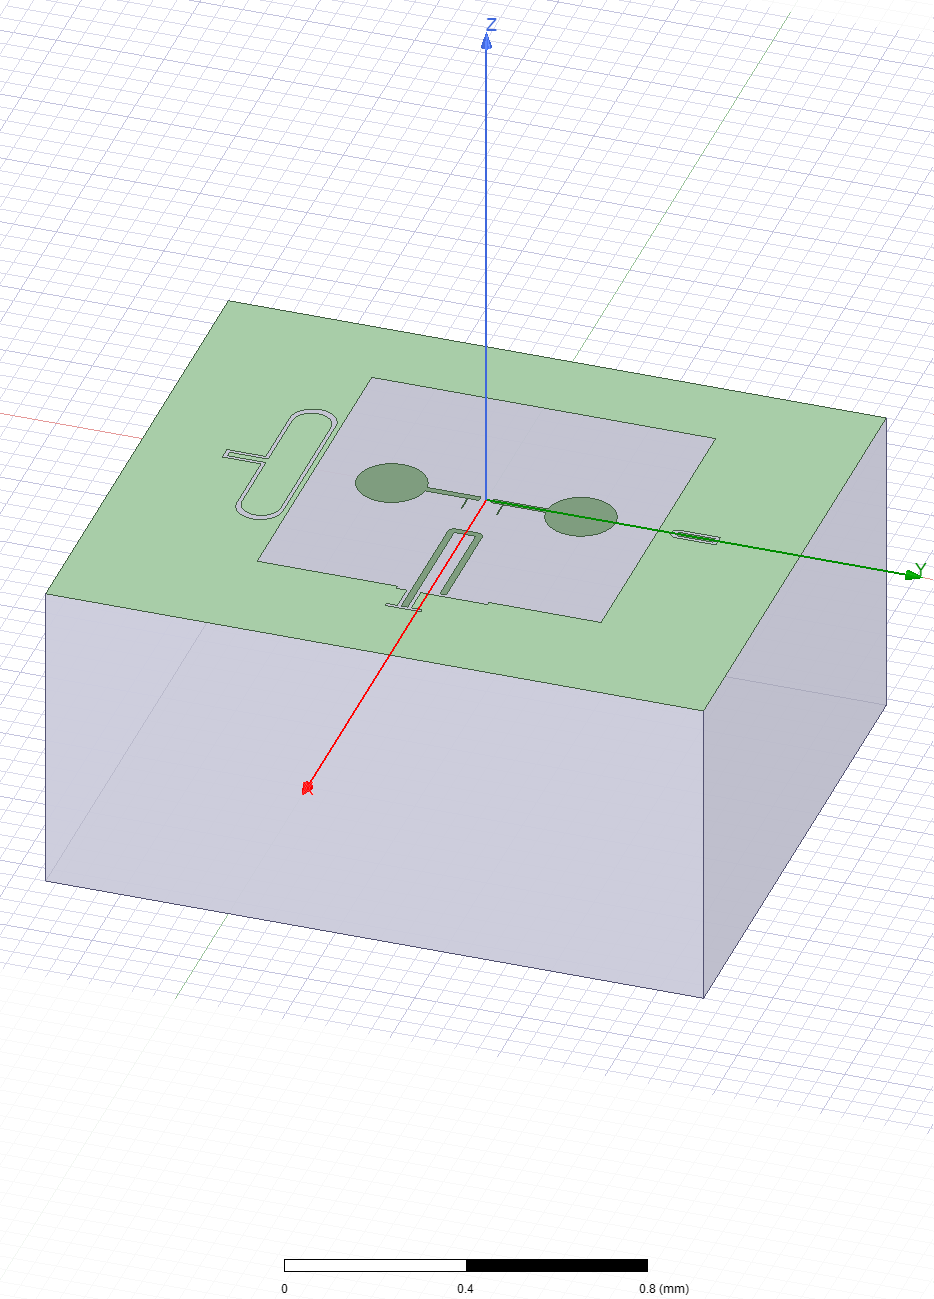

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/Fluxonuim/ansys.png')

In [13]:
c1.sim.save_screenshot()

In [148]:
c1.sim.setup.freq_ghz = 1.0
c1.sim.run()
c1.sim.capacitance_matrix

INFO 06:57PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 06:57PM [analyze]: Analyzing setup Setup
INFO 06:59PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp2wevtr1m.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 1000000000, Maxwell, 1, False
INFO 06:59PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmptaq04s4e.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 1000000000, Maxwell, 1, False
INFO 06:59PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp7at716en.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 1000000000, Maxwell, 2, False
INFO 06:59PM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpvgrtakgz.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 1000000000, Maxwell, 3, False
INFO 06:59PM [get_matrix]: Exporting matrix data to (C:\Users\F

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,16.82388,-0.03342,-16.43462,-0.03115,-0.20100,-0.01247
flux_bias_line_Q1,-0.03342,56.63635,-45.29318,-4.52903,-4.51593,-1.01803
ground_main_plane,-16.43462,-45.29318,327.21723,-31.66264,-35.71727,-128.28841
pad_bot_Q1,-0.03115,-4.52903,-31.66264,49.01271,-5.34103,-5.18521
pad_top_Q1,-0.20100,-4.51593,-35.71727,-5.34103,48.95731,-0.82462
readout_padNline_Q1,-0.01247,-1.01803,-128.28841,-5.18521,-0.82462,136.66748


In [149]:
type(c1.sim.capacitance_matrix)

pandas.core.frame.DataFrame

In [14]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

# Q1 details
options = dict(chip='main', pad_gap='30um', inductor_width='10um', orientation='0',
        pad_width='15um', pad_height='250um',  
        pad_radius='80um',  l_arm_length='50um', l_length='1um',
        l_inductance='200nH',
        l_ind_per_square='2nH',
        l_fillet = '5um', 
        L_j = '16.35nH',
        pocket_width='800um',
        pocket_height='800um',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='150um', fbl_height ='50um', fillet = '110um',
            cpw_width ='cpw_width',
            cpw_gap = 'cpw_gap',
                               ), 
               
    charge_line_options=Dict(loc_H = +1, loc_W='0', make_cl = True,
                         cl_length = '100um',
            cl_sep ='-15um',
            cpw_width='cpw_width',
            cpw_gap= 'cpw_gap', 
                            ), 
    readout_line_options=Dict(loc_H = -1, loc_W='0', make_rol = True, 
            pad_width = '350um', pad_height = '90um',
            pad_sep='65um',  cpw_width='cpw_width',
            cpw_gap='cpw_gap',
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
      #  hfss_inductance = '10nH',
        q3d_inductance = '16.35nH',
        **options))

gui.rebuild()
#gui.autoscale()

In [ ]:
#??c1.setup.junctions

In [169]:
c1.setup.junctions = Dict({'Lj': 16.35, 'Cj': 5})
c1.setup.freq_readout = [1.0]
c1.setup.freq_bus = [5.0, 6.0]

c1.run_lom()
c1.lumped_oscillator_all

[3, 4] [5 0 1]
Predicted Values

Transmon Properties
f_Q 6.368864 [GHz]
EC 624.684400 [MHz]
EJ 9.993615 [GHz]
alpha -866.238642 [MHz]
dispersion 29799.080777 [KHz]
Lq 16.343407 [nH]
Cq 31.008023 [fF]
T1 178164.100234 [us]

**Coupling Properties**

tCqbus1 2.174866 [fF]
gbus1_in_MHz 8.752051 [MHz]
χ_bus1 -0.008259 [MHz]
1/T1bus1 0.794031 [Hz]
T1bus1 200439.092391 [us]

tCqbus2 -0.085224 [fF]
gbus2_in_MHz -1.715236 [MHz]
χ_bus2 -0.007451 [MHz]
1/T1bus2 0.098548 [Hz]
T1bus2 1615001.386946 [us]

tCqbus3 -0.001636 [fF]
gbus3_in_MHz -0.039401 [MHz]
χ_bus3 0.000015 [MHz]
1/T1bus3 0.000726 [Hz]
T1bus3 219213229.070612 [us]
Bus-Bus Couplings
gbus1_2 0.009291 [MHz]
gbus1_3 0.632275 [MHz]
gbus2_3 0.110976 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,6.471701,648.068751,9.993615,-908.051355,35993.316703,"[8.28539322627168, -1.1677308920544738, -1.959...","[-0.007534812674458297, -0.0030057955652958122...",0.007535,8.285393
2,6.495256,653.507115,9.993615,-917.85093,37551.591029,"[7.961815693466137, -1.6307681626178228, -0.22...","[-0.006986542023259288, -0.005694600817183273,...",0.006987,7.961816
3,6.463231,646.12065,9.993615,-904.547597,35446.124925,"[8.233483782713744, -1.6670269973639862, 0.436...","[-0.007429691802553863, -0.006191435079036099,...",0.007430,8.233484
4,6.439135,640.600476,9.993615,-894.638759,33926.782311,"[8.362504628068871, -1.6700170257982048, 0.313...","[-0.0076322588721402344, -0.006409666095411983...",0.007632,8.362505
5,6.423067,636.937354,9.993615,-888.079663,32943.773374,"[8.500623484769763, -1.671791827542937, 0.3254...","[-0.007864490295395826, -0.006561694347936567,...",0.007864,8.500623
6,6.404761,632.78107,9.993615,-880.653723,31852.497156,"[8.602955463576516, -1.7063427997536735, -0.03...","[-0.0080295046337541, -0.007008118500294888, 1...",0.008030,8.602955
7,6.392413,629.988032,9.993615,-875.67335,31133.398,"[8.725940949687528, -1.7211685487097612, -0.05...","[-0.008243144536640054, -0.007254035039137626,...",0.008243,8.725941
8,6.384394,628.178672,9.993615,-872.451327,30673.620509,"[8.77567793267498, -1.7113580111653155, -0.112...","[-0.008325882222478927, -0.007253311245960901,...",0.008326,8.775678
9,6.375711,626.223432,9.993615,-868.973389,30182.099808,"[8.776376824076122, -1.7139154973435264, -0.05...","[-0.008314793486530199, -0.007365977627125778,...",0.008315,8.776377
10,6.368864,624.6844,9.993615,-866.238642,29799.080777,"[8.752050518914942, -1.7152363745321941, -0.03...","[-0.008259056372949327, -0.007450857906521004,...",0.008259,8.752051


In [154]:
c1.plot_convergence();
c1.plot_convergence_chi()

  self._hfss_variables[variation] = pd.Series(

INFO 07:02PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Design_q3d" info:
	# eigenmodes    0
	# variations    1


In [14]:
c1.sim.close()

## 3. Directly access the renderer to modify other parameters

In [38]:
c1.sim.start()
c1.sim.renderer

INFO 03:26PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:26PM [load_ansys_project]: 	Opened Ansys App
INFO 03:26PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 03:26PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project16
INFO 03:26PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 03:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:26PM [connect]: 	Connected to project "Project16" and design "Design_q3d" 😀 



##### Prepare and run a collection of predefined setups

This is equivalent to going to the Project Manager panel in Ansys, right clicking on Analysis within the active Q3D design, selecting "Add Solution Setup...", and choosing/entering default values in the resulting popup window. You might want to do this to keep track of different solution setups, giving each of them a different/specific name.

In [39]:
setup = c1.sim.renderer.new_ansys_setup(name = "Setup_demo", max_passes = 10)

In [40]:
c1.sim.renderer.analyze_setup(setup.name)

INFO 03:26PM [get_setup]: 	Opened setup `Setup_demo`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:26PM [analyze]: Analyzing setup Setup_demo


In [ ]:
# Using the analysis results, get its capacitance matrix as a dataframe.
c1.sim.renderer.get_capacitance_matrix(variation = '', solution_kind = 'AdaptivePass', pass_number = 5)

In [41]:
c1.sim.close()

In [16]:
gui.main_window.close()

True

In [16]:
draw.box?

## Exporting GDS

In [2]:
design = designs.DesignPlanar({}, True)
design.chips.main.material = 'silicon'
design.chips.main.size['size_x'] = '9mm'
design.chips.main.size['size_y'] = '9mm'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'

design.delete_all_components()


hfss = design.renderers.hfss
gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.fluxtryH import FluxoniumPocket
# Q5 details
options = dict(chip='main',
    orientation =90, pos_x = '2.0mm', pos_y = '0.8mm',
                       pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um', l_width='1um',
               
    flux_bias_line_options=Dict(make_fbl = False,
             fbl_sep='100um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,                    
            cl_sep ='-10um',                ), 
    readout_line_options=Dict(loc_H = +1, make_rol = False, 
         pad_width = '300um', pad_height = '80um',
            pad_sep='60um',    ) )
               
q5 = FluxoniumPocket(design,'Q5', options = dict(
        gds_cell_name ='FakeJunction_01',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

gui.rebuild()

In [7]:
#QDesign registers GDS renderer during init of QDesign.
fq_gds = design.renderers.gds
# An alternate way to invoke gds commands without using a_gds:
# design.renderers.gds.export_to_gds()

#Show the options for GDS
fq_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': 'False',
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '100um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '200um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [8]:
fq_gds.options.no_cheese.buffer = '40um'
fq_gds.options.max_points = 255
fq_gds.options.cheese.cheese_0_x = '3um'
fq_gds.options.cheese.cheese_0_y = '3um'
fq_gds.options.cheese.view_in_files= {'main': {1: True}}

In [1]:
fq_gds.export_to_gds("Fluxoniumtry2.gds")

NameError: name 'fq_gds' is not defined